In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


In [5]:
df =pd.read_csv("/drug200.csv")

In [6]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


 **About Dataset**   

 This report analyzes a drug dataset that contains information on various factors such as age, sex, blood pressure level, cholesterol level, and sodium to potassium level, and their potential impact on drug-related outcomes. The purpose of this analysis is to gain a better understanding of how these variables are related to drug effects and patient outcomes.

**Dataset Description**     
The dataset used for this analysis contains the following variables:

1. Age: The age of the patients, recorded in years.     
2. Sex: The gender of the patients, categorized as male or female.   
3. Blood Pressure Level: The blood pressure level of the patients, which may be categorized as high, normal, or low.   
4. Cholesterol Level: The cholesterol level of the patients, categorized as high, normal, or low.    
5. Sodium to Potassium Level: The ratio of sodium to potassium levels in the patients' blood.

In [7]:
df.columns


Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [8]:
df.shape

(200, 6)

In [9]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


1. Checking missing values

<Axes: >

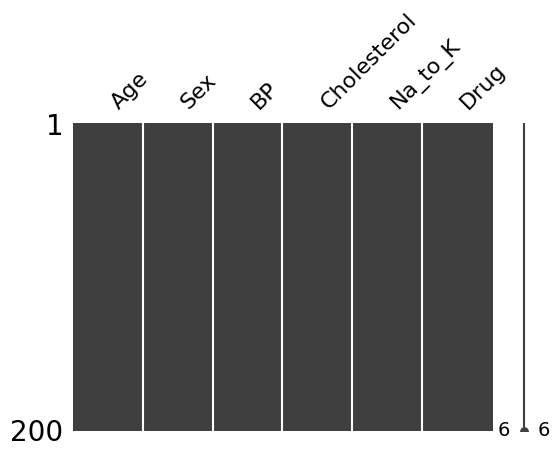

In [11]:
import missingno as msno
msno.matrix(df,figsize=(6,4))

In [12]:
max_age = df["Age"].max()
min_age = df["Age"].min()
print("The max Age of the person in the DataFrame is :",max_age)
print("The min Age of the person in the DataFrame is :",min_age)

The max Age of the person in the DataFrame is : 74
The min Age of the person in the DataFrame is : 15


**Age**

<Axes: xlabel='Age', ylabel='Count'>

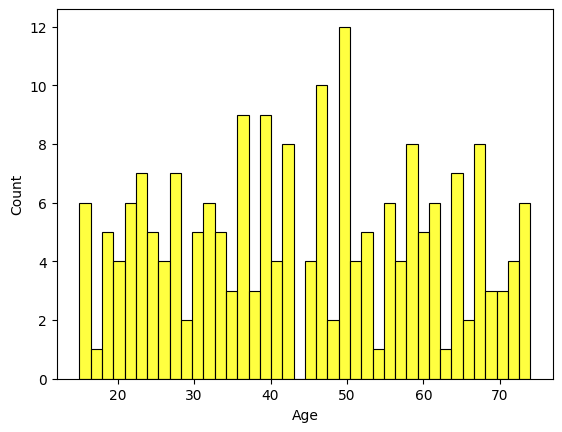

In [13]:
sns.histplot(df["Age"],bins=40,color="yellow")

<Axes: >

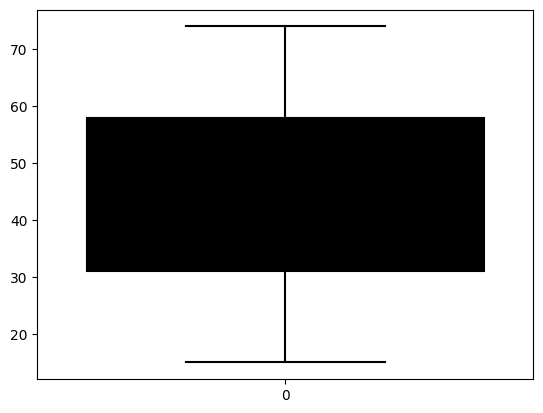

In [14]:
sns.boxplot(df["Age"],color="black")

**Sex**

Text(0, 0.5, 'Count')

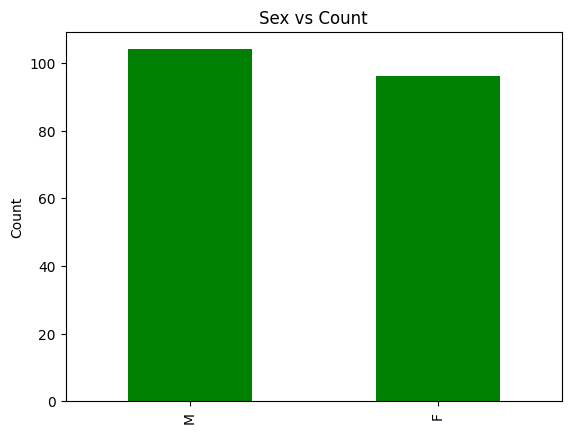

In [15]:
df["Sex"].value_counts().plot(kind="bar",color="green")
plt.title("Sex vs Count")
plt.ylabel("Count")

<Axes: ylabel='Sex'>

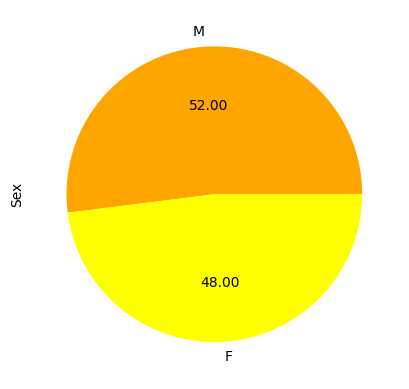

In [16]:
colors = ["orange","yellow"]
df["Sex"].value_counts().plot(kind="pie",autopct="%.2f",colors=colors)

**Cholestrol**

Text(0, 0.5, 'Count value')

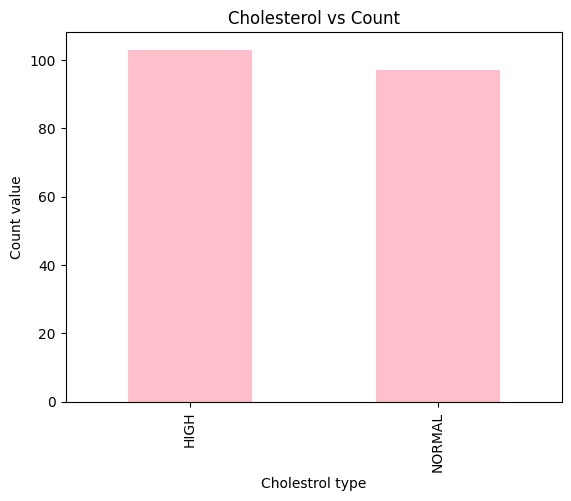

In [17]:
df["Cholesterol"].value_counts().plot(kind="bar",color="pink")
plt.title("Cholesterol vs Count")
plt.xlabel("Cholestrol type")
plt.ylabel("Count value")

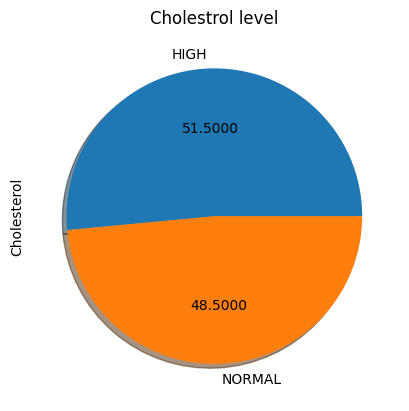

In [18]:
df["Cholesterol"].value_counts().plot(kind="pie",autopct="%.4f",shadow=True)
plt.title("Cholestrol level");

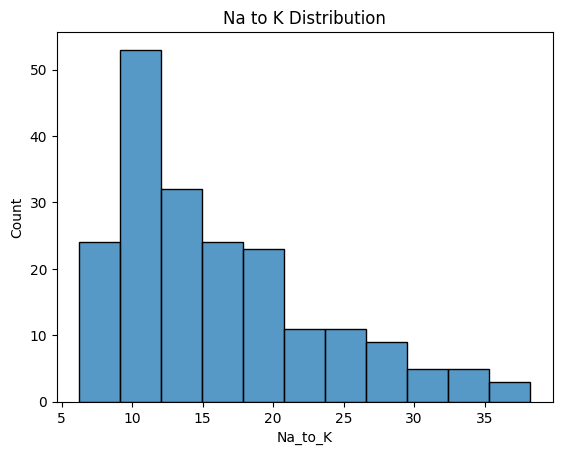

In [19]:
sns.histplot(df["Na_to_K"])
plt.title("Na to K Distribution");

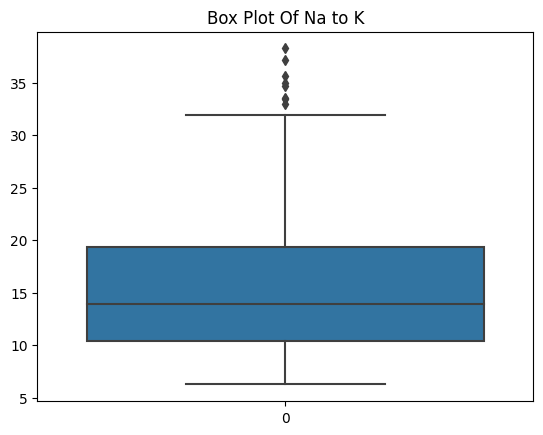

In [20]:
sns.boxplot(df["Na_to_K"])
plt.title("Box Plot Of Na to K");

<Axes: >

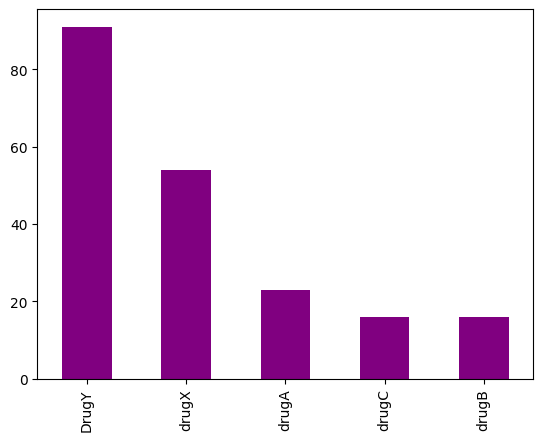

In [21]:
df["Drug"].value_counts().plot(kind="bar",color="purple")

<Axes: ylabel='Drug'>

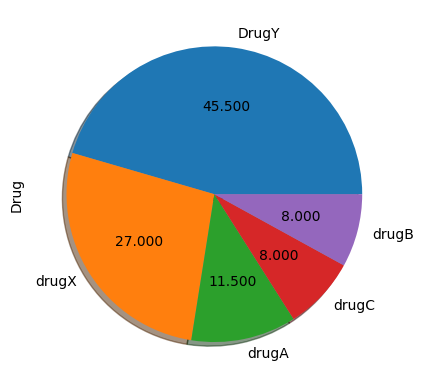

In [22]:
df["Drug"].value_counts().plot(kind="pie",autopct="%.3f",shadow=True)

**Bp**

Text(0, 0.5, 'Count')

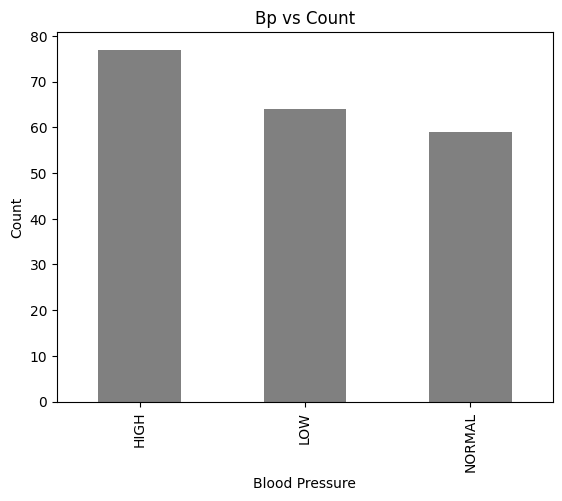

In [23]:
df["BP"].value_counts().plot(kind="bar",color="grey")
plt.title("Bp vs Count")
plt.xlabel("Blood Pressure")
plt.ylabel("Count")

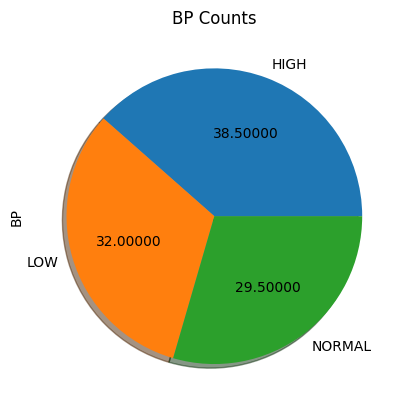

In [24]:
df["BP"].value_counts().plot(kind="pie",autopct="%.5f",shadow=True)
plt.title("BP Counts");

**Analysis**  
. Age has no outliers in the data       
. Males have a 52 % percent data in the dataset while females have 48%      
. People with High BP has more percentage in the data while normal have the least .   
. Sodium to pottasium has outliers in the data after a certain range such as 30-35 .  
. Drug Y has most percentage in the Drug Classification while the Drug C have the least .   

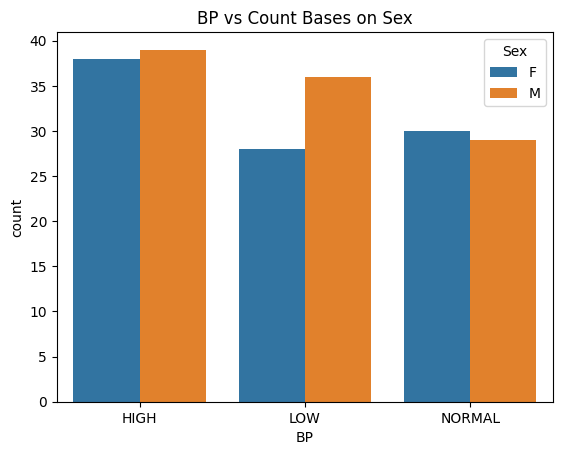

In [25]:
sns.countplot(x="BP",data=df,hue="Sex")
plt.title("BP vs Count Bases on Sex");

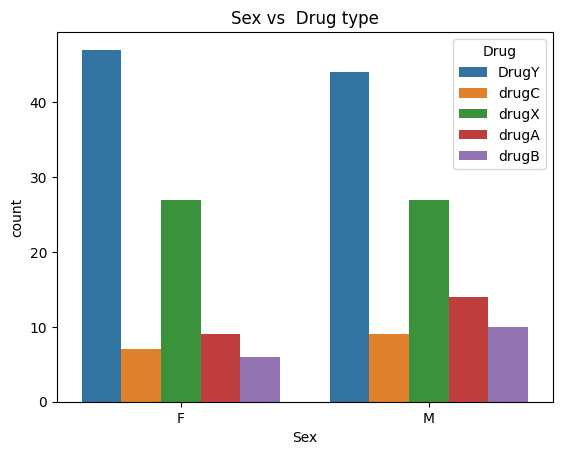

In [26]:
sns.countplot(x="Sex",data=df,hue="Drug")
plt.title("Sex vs  Drug type");

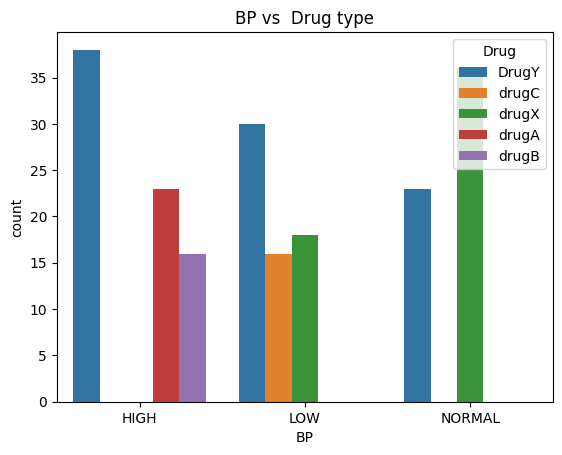

In [27]:
sns.countplot(x="BP",data=df,hue="Drug")
plt.title("BP vs  Drug type");

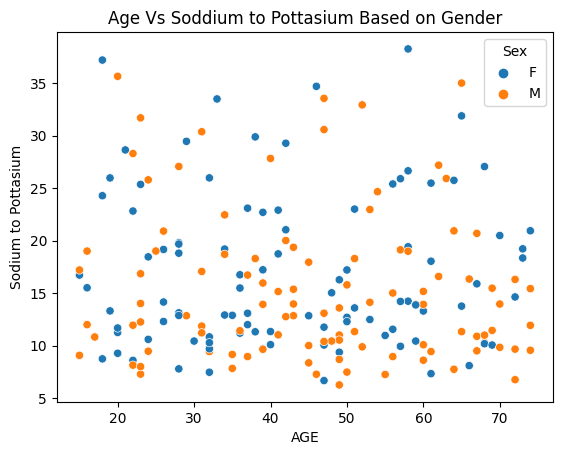

In [28]:
sns.scatterplot(x="Age",y="Na_to_K",data=df,hue="Sex")
plt.title("Age Vs Soddium to Pottasium Based on Gender")
plt.xlabel("AGE")
plt.ylabel("Sodium to Pottasium");

In [29]:
from sklearn.preprocessing import LabelEncoder

def label_encoder(y):
    le = LabelEncoder()
    df[y] = le.fit_transform(df[y])

label_list = ["Sex","BP","Cholesterol","Na_to_K","Drug"]

for l in label_list:
    label_encoder(l)

In [30]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,167,0
1,47,1,1,0,89,3
2,47,1,1,0,43,3
3,28,0,2,0,10,4
4,61,0,1,0,133,0


In [31]:
X = df.drop("Drug",axis=1).values
y = df["Drug"].values

**Training dataset**

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=40)
print(X_train.shape,y_train.shape)

(140, 5) (140,)


In [33]:
models = [("LR",LogisticRegression()),
          ("NB",GaussianNB()),
          ("SGD",SGDClassifier()),
         ("KNN",KNeighborsClassifier()),
         ("DTC",DecisionTreeClassifier()),
         ("SVM",SVC()),
         ("RFC",RandomForestClassifier())]

In [34]:
from sklearn.metrics import accuracy_score
accuracy = []
for name,model in models:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test,y_pred)
    accuracy.append(score)
    print(f"The Accuracy score of the {model} represented as {name} is :" ,score)
    print("---"*30)

The Accuracy score of the LogisticRegression() represented as LR is : 0.8833333333333333
------------------------------------------------------------------------------------------
The Accuracy score of the GaussianNB() represented as NB is : 0.85
------------------------------------------------------------------------------------------
The Accuracy score of the SGDClassifier() represented as SGD is : 0.4166666666666667
------------------------------------------------------------------------------------------
The Accuracy score of the KNeighborsClassifier() represented as KNN is : 0.6833333333333333
------------------------------------------------------------------------------------------
The Accuracy score of the DecisionTreeClassifier() represented as DTC is : 1.0
------------------------------------------------------------------------------------------
The Accuracy score of the SVC() represented as SVM is : 0.7666666666666667
----------------------------------------------------------

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [35]:
acc = pd.DataFrame(accuracy,columns=["accuracy"])

In [36]:
acc["Name"] = ["LR","NB","SGD","KNN","DTC","SVM","RFC"]

<Axes: xlabel='Name', ylabel='accuracy'>

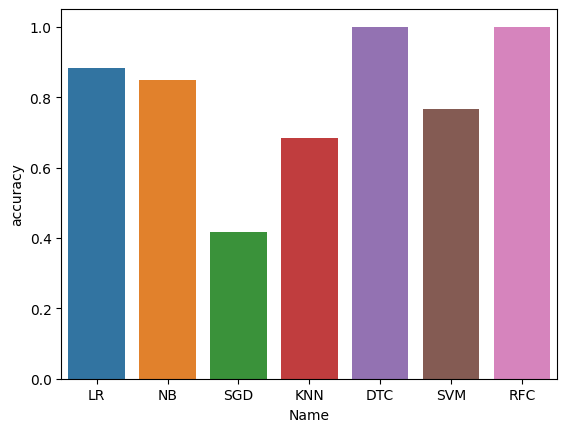

In [37]:
sns.barplot(x=acc["Name"],y=acc["accuracy"])

**As we know best accuracy is provided by Random forest Classifier**

**Conclusion**

The analysis of the drug dataset has provided insights into the relationships between age, sex, blood pressure level, cholesterol level, sodium to potassium level, and drug-related outcomes. These findings can be valuable for healthcare professionals and researchers looking to optimize drug treatments and patient care. Further statistical analyses and machine learning models may be applied to determine the significance and predictive power of these variables on drug outcomes.